# Linear Regression

In [1]:
%matplotlib inline
import csv
from collections import Counter
from matplotlib import pyplot as plt

In [6]:
def read_dataset(file_name, to_dtype=int ):
    data = []
    with open(file_name, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            data = [to_dtype(r) for r in row]
            
    return data

num_friends_good = read_dataset('../data/friends.csv')
print(num_friends_good[:20])

[49, 41, 40, 25, 21, 21, 19, 19, 18, 18, 16, 15, 15, 15, 15, 14, 14, 13, 13, 13]


In [8]:
daily_minutes_good = read_dataset('../data/daily_minutes.csv', float)
print(daily_minutes_good[:20])

[68.77, 51.25, 52.08, 38.36, 44.54, 57.13, 51.4, 41.42, 31.22, 34.76, 54.01, 38.79, 47.59, 49.1, 27.66, 41.03, 36.73, 48.65, 28.12, 46.62]


In [10]:
from pandas import DataFrame

friends_X = DataFrame(data=num_friends_good, columns=['friends'])
friends_X.head()

,#friends
0,49
1,41
2,40
3,25
4,21


In [13]:
minutes_Y = DataFrame(data=daily_minutes_good, columns=['minutes'])
minutes_Y.head()

,minutes
0,68.77
1,51.25
2,52.08
3,38.36
4,44.54


In [14]:
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

## Train the model

In [15]:
# Train the model using the training sets
regr.fit(friends_X, minutes_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error

print("Mean squared error: %.2f"
      % np.mean((regr.predict(friends_X) - minutes_Y) ** 2))


Coefficients: 
 [[ 0.90386595]]
Mean squared error: 65.01


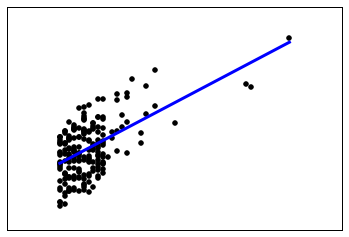

In [40]:
# Plot outputs
plt.scatter(friends_X, minutes_Y,  color='black')
plt.plot(friends_X, regr.predict(friends_X), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

In [52]:
regr.score(friends_X, minutes_Y)

0.32910783778362984

In [53]:
predict_Y = regr.predict(friends_X)

In [54]:
regr.score(friends_X, predict_Y)

1.0